Integrantes

Grecia Abigaíl Martínez Ambríz 1805217

Luis Aldair Hernández Martínez 1616940

# Introduccion

## ¿Qué es el IGAE?
Es el Indicador Global de la Actividad Económica (IGAE).  

## ¿Qué mide?
El IGAE ofrece una visión oportuna, completa y coherente de la evolución de la actividad económica del país, proporcionando información oportuna, para apoyar en la toma de decisiones.

## ¿Cual es la frecuencia de los datos?
Los datos de nuestra Base, se generaron de manera mensual 



In [2]:
#1
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
igae = pd.read_csv('https://raw.githubusercontent.com/alda1rx/bases/main/igae.csv', index_col= 'Periodos', parse_dates = True )

In [4]:
igae

,IGAE
Periodos,
1993-01-01,60.407691
1993-02-01,61.022521
1993-03-01,63.943249
1993-04-01,61.865984
1993-05-01,63.612900
...,...
2021-10-01,108.358461
2021-11-01,112.694729
2021-12-01,112.152267


In [5]:
#Prueba de estacionalidad
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA

In [6]:
#fijamos tamaño de graficas
plt.rcParams['figure.figsize'] = [10, 7.5]

## A continuación, la grafica del IGAE

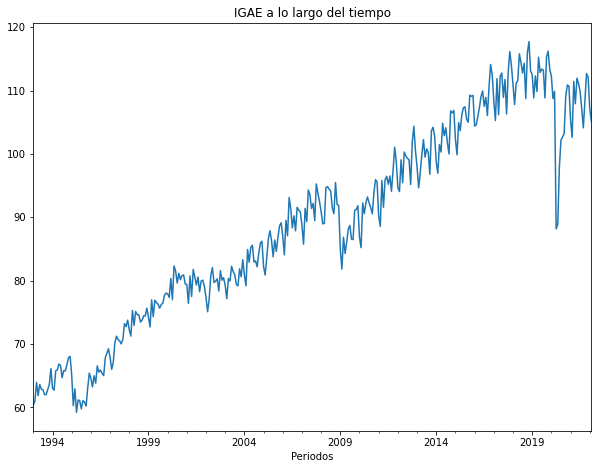

In [7]:
# vamos a graficar
igae.IGAE.plot()
plt.title('IGAE a lo largo del tiempo')
plt.show()

Podemos observar que la grafíca anterior, nos muestra que los datos obtenidos tienen una tendencia alsista o en crecimniento

## 2.- ¿Se observa estacionalidad?
En la grafica podemos observar que tenemos tanto subidas como bajadas en los porcentajes, en los cuales regularmente son por temporadas vacacionales 

Asi mismo podemos ver, que hay un desplome a partir del ultimo trimestre del 2019 (09/2019) y en el ultimo trimestre de 2020 (09/2020 comienza a estabilizarse aproximadamen un año despues.

Recordemos que durante el ese tiempo que presento la baja en nuestro indicador, fue en el momento mas fuerte de la pandemia a nivel mundial, por lo cual, debido a lo anterior, definimos que éste fue el motivo del desplome 

## 3.- Uno los propósitos fundamentales del análisis de series de tiempo es el pronóstico, es decir, “anticipar valores futuros de la variable”

### ¿Para quién es importante conocer el pronostico del IGAE?
Los datos del IGAE son importantes tanto para organismos nacionales como internacionales tales como

Las Naciones Unidas (ONU) 

La Organización para la Cooperación y Desarrollo Económicos(OCDE)

El Banco Mundial (BM)

El Fondo Monetario Internacional (FMI) 

La Comisión Europea

### ¿Por qué?
Es importante para la toma de desiciones de manera interna y externa

En lo interno para generar y llevar a cabo planes y estrategias, con el fin de aumentarlo y con esto mismo, mejorar las condiciones del pais 

En lo externo, para el comercio y la inversion internacional


In [8]:
#4.- Estadisticas descriptivas de la serie de tiempo
print('Rango de fechas:', min(igae.index), '-', max(igae.index))
print('Numero de observaciones:', igae.shape[0])
print(f'Media: {igae.IGAE.mean():.4f}')
print(f'Mediana: {igae.IGAE.median():.4f}')
print(f'Mínimo: {igae.IGAE.min():.4f}')
print(f'Máximo: {igae.IGAE.max():.4f}')
print(f'Desviación Estándar: {igae.IGAE.std():.4f}')
print(f'Skewness (símetría): {igae.IGAE.skew():.4f}') ## que tan centrada esta la dist
print(f'Kurtosis: {igae.IGAE.kurtosis():.4f}')     ## que tan alta esta la dist

Rango de fechas: 1993-01-01 00:00:00 - 2022-02-01 00:00:00
Numero de observaciones: 350
Media: 88.9481
Mediana: 88.8526
Mínimo: 59.2391
Máximo: 117.7435
Desviación Estándar: 15.7706
Skewness (símetría): -0.0584
Kurtosis: -1.0608


In [9]:
#5.- Promedio movil de la serie a 3 meses y a 6 meses
igae['PMS_3meses'] = igae['IGAE'].rolling(window=3).mean()
igae['PMS_6meses'] = igae['IGAE'].rolling(window=6).mean()

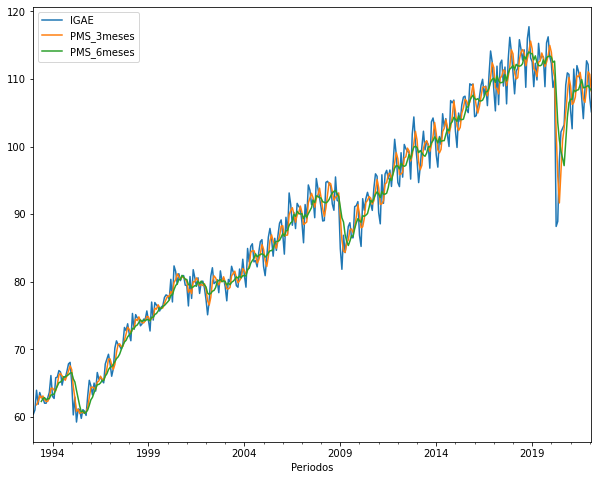

In [10]:
igae[['IGAE','PMS_3meses','PMS_6meses']].plot(figsize=(10,8));

### 6 Descomposicion estacional

In [11]:
igae.dropna(inplace = True )

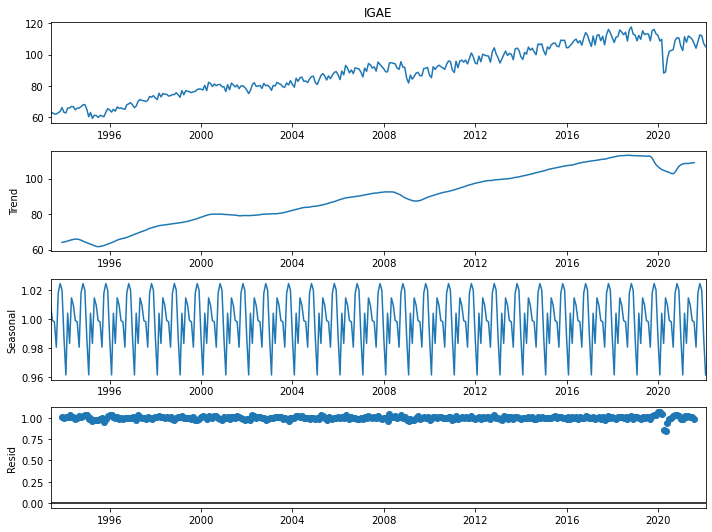

In [12]:
#6.- Descomposicion estacional
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(igae['IGAE'], model='multiplicative')  #mul tambien funciona
result.plot();

In [13]:
#vamos a obtner la serie desestacionalizada
#primero obtenemos el componente estacional al que accedemos con .seasonal del objeto result
componente_estacional = result.seasonal
igae['desestacionalizado'] = igae['IGAE'] / componente_estacional

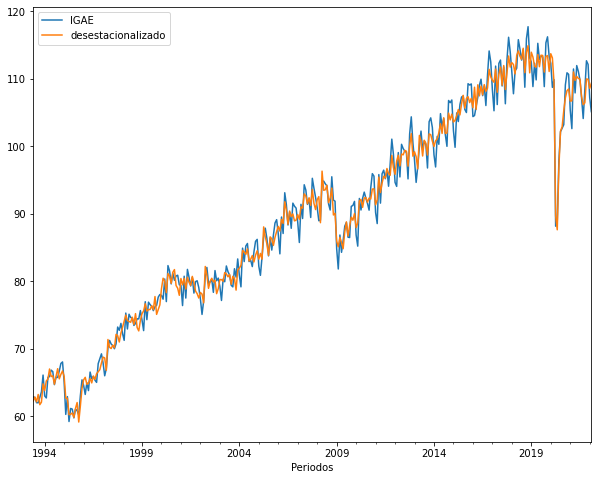

In [14]:
#graficamos
igae[['IGAE','desestacionalizado']].plot(figsize=(10,8));